Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 4

## Assignment

- [ ] Watch Aaron Gallant's [video #1](https://www.youtube.com/watch?v=pREaWFli-5I) (12 minutes) & [video #2](https://www.youtube.com/watch?v=bDQgVt4hFgY) (9 minutes) to learn about the mathematics of Logistic Regression.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Do one-hot encoding. (Remember it may not work with high cardinality categoricals.)
- [ ] Use scikit-learn for logistic regression.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your coefficients.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.


## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Clean the data. For ideas, refer to [The Quartz guide to bad data](https://github.com/Quartz/bad-data-guide),  a "reference to problems seen in real-world data along with suggestions on how to resolve them." One of the issues is ["Zeros replace missing values."](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values)
- [ ] Make exploratory visualizations.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from the previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```

#### Pipelines

[Scikit-Learn User Guide](https://scikit-learn.org/stable/modules/compose.html) explains why pipelines are useful, and demonstrates how to use them:

> Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:
> - **Convenience and encapsulation.** You only have to call fit and predict once on your data to fit a whole sequence of estimators.
> - **Joint parameter selection.** You can grid search over parameters of all estimators in the pipeline at once.
> - **Safety.** Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

### Reading
- [ ] [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)
- [ ] [Always start with a stupid model, no exceptions](https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa)
- [ ] [Statistical Modeling: The Two Cultures](https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726)
- [ ] [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapters 1-3, for more math & theory, but in an accessible, readable way (without an excessive amount of formulas or academic pre-requisites).



In [1]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module4')

In [2]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [3]:
import pandas as pd

train_features = pd.read_csv('../data/tanzania/train_features.csv')
train_labels = pd.read_csv('../data/tanzania/train_labels.csv')
test_features = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
assert sample_submission.shape == (14358, 2)

In [36]:
train_features.head().T

,0,1,2,3,4
id,69572,8776,34310,67743,19728
amount_tsh,6000,0,25,0,0
date_recorded,2011-03-14,2013-03-06,2013-02-25,2013-01-28,2011-07-13
funder,Roman,Grumeti,Lottery Club,Unicef,Action In A
gps_height,1390,1399,686,263,0
installer,Roman,GRUMETI,World vision,UNICEF,Artisan
longitude,34.9381,34.6988,37.4607,38.4862,31.1308
latitude,-9.85632,-2.14747,-3.82133,-11.1553,-1.82536
wpt_name,none,Zahanati,Kwa Mahundi,Zahanati Ya Nanyumbu,Shuleni
num_private,0,0,0,0,0


In [ ]:
import pandas_profiling

train_features.profile_report()

In [7]:
##Accuracy

from sklearn.metrics import accuracy_score

### Train Test

In [5]:
from sklearn.model_selection import train_test_split

In [8]:
X_train = train_features
y_train = train_labels['status_group']

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, train_size=0.80, test_size=0.20,
    stratify=y_train, random_state=42
)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47520, 40), (11880, 40), (47520,), (11880,))

In [10]:
import sklearn; sklearn.__version__

'0.21.2'

In [12]:
X_train_numeric = X_train.select_dtypes('number')
X_val_numeric = X_val.select_dtypes('number')

In [13]:
X_train_numeric.isnull().sum()

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000, n_jobs=-1)
model.fit(X_train_numeric, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = model.predict(X_val_numeric)
accuracy_score(y_val, y_pred)

0.5541245791245791

In [16]:
model.score(X_val_numeric, y_val)

0.5541245791245791

In [17]:
y_pred

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

### One Hot Encoding

In [18]:
X_train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,47520,1,GeoData Consultants Ltd,47520
public_meeting,44876,2,True,40838
permit,45077,2,True,31071
source_class,47520,3,groundwater,36638
management_group,47520,5,user-group,42027
quantity_group,47520,5,enough,26567
quantity,47520,5,enough,26567
waterpoint_type_group,47520,6,communal standpipe,27642
quality_group,47520,6,good,40598
payment_type,47520,7,never pay,20287


In [ ]:
source_class,quantity,extraction_type

In [19]:
X_train['quantity'].value_counts(dropna=False)

enough          26567
insufficient    12153
dry              4921
seasonal         3244
unknown           635
Name: quantity, dtype: int64

In [20]:
X_train['source_class'].value_counts(dropna=False)

groundwater    36638
surface        10648
unknown          234
Name: source_class, dtype: int64

In [21]:
X_train['extraction_type'].value_counts(dropna=False)

gravity                      21448
nira/tanira                   6526
other                         5193
submersible                   3770
swn 80                        2930
mono                          2261
india mark ii                 1928
afridev                       1435
ksb                           1124
other - rope pump              353
other - swn 81                 184
windmill                        93
india mark iii                  73
cemo                            70
other - play pump               65
walimi                          42
climax                          24
other - mkulima/shinyanga        1
Name: extraction_type, dtype: int64

In [28]:
train = X_train.copy()
train['status_group'] = y_train

train.groupby('source_class')['status_group'].value_counts(normalize=True)

source_class  status_group           
groundwater   functional                 0.541460
              non functional             0.398575
              functional needs repair    0.059965
surface       functional                 0.548554
              non functional             0.333866
              functional needs repair    0.117581
unknown       functional                 0.547009
              non functional             0.431624
              functional needs repair    0.021368
Name: status_group, dtype: float64

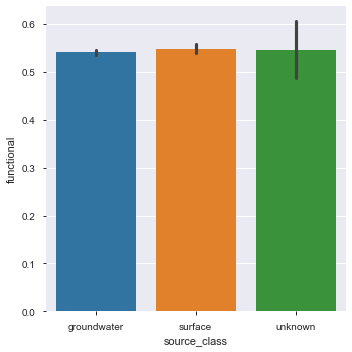

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# This will give an error:
# sns.catplot(x='quantity', y='status_group', data=train, kind='bar')

train['functional'] = (train['status_group']=='functional').astype(int)

sns.catplot(x='source_class', y='functional', data=train, kind='bar');

In [47]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

categorical_features = ['quantity','source_class','extraction_type','basin','water_quality']
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
features = categorical_features + numeric_features

In [48]:
X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

# X_val_subset.head()

Validation Accuracy 0.6982323232323232


In [34]:
X_train_encoded.head()

,quantity_insufficient,quantity_enough,quantity_dry,quantity_seasonal,quantity_unknown,quantity_-1,source_class_groundwater,source_class_surface,source_class_unknown,source_class_-1,...,extraction_type_-1,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
43360,1,0,0,0,0,0,1,0,0,0,...,0,0.0,0,33.542898,-9.174777,0,12,4,0,0
7263,0,1,0,0,0,0,1,0,0,0,...,0,500.0,2049,34.665760,-9.308548,0,11,4,175,2008
2486,1,0,0,0,0,0,1,0,0,0,...,0,25.0,290,38.238568,-6.179919,0,6,1,2300,2010
313,0,1,0,0,0,0,1,0,0,0,...,0,0.0,0,30.716727,-1.289055,0,18,1,0,0
52726,0,1,0,0,0,0,1,0,0,0,...,0,0.0,0,35.389331,-6.399942,0,1,6,0,0


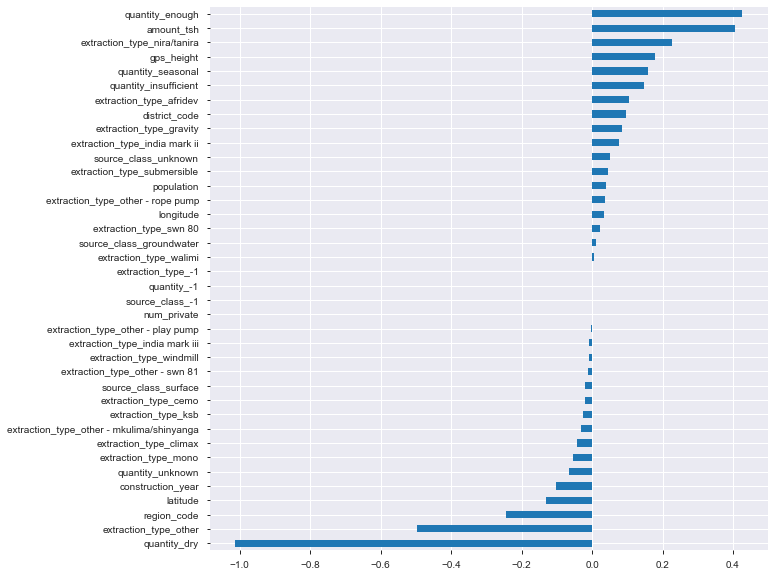

In [35]:
functional_coefficients = pd.Series(
    model.coef_[0],
    X_train_encoded.columns
)

plt.figure(figsize=(10, 10))
functional_coefficients.sort_values().plot.barh();

In [49]:
X_test_subset = test_features[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)
assert all(X_test_encoded.columns == X_train_encoded.columns)

In [50]:
y_pred = model.predict(X_test_scaled)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-01.csv', index=False)

'head' is not recognized as an internal or external command,
operable program or batch file.
